In [1]:
import requests
from bs4 import BeautifulSoup

   ## Used BeautifulSoup to scrape data from websites

In [2]:
!pip install beautifulsoup4

In [3]:
url = "https://kiswahili.tuko.co.ke/michezo/498955-nyota-7-za-man-united-ambao-wanaweza-kuuzwa-katika-msimu-wa-joto-ili-kufadhili-matumizi-ya-spree/"
response = requests.get(url)

In [4]:
soup = BeautifulSoup(response.content, 'html.parser')

In [5]:
links = soup.find_all('a')
for link in links:
    link.get('href')


In [6]:
data = soup.get_text()

## Writing data scrapped into a file 

In [7]:
with open('Swahili_data.csv', 'w',encoding='utf8') as file:
    file.write(data)

In [8]:
import pandas as pd

# Load a CSV file
data = pd.read_csv('Swahili_data.csv')

In [9]:
data.head()

,Swahilitext
0,1\t%2012/Act%20555.pdf sheria ya 1996 iliyoruh...
1,"2\t` 32 Basi, Mungu alimfufua huyo Yesu na sis..."
2,"3\t` 7 Hapo, Herode aliwaita faraghani hao wat..."
3,4\tAACE iliendelea na kazi yake ya uanzilishi ...
4,5\tA Albamu hii ya Emotions imefanikiwa kuuza ...


In [10]:
import csv
import re
import nltk
import string

In [11]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize

stop_words = [
    'na', 'ya', 'kwa', 'za', 'ni', 'wakati', 'hata', 'ili', 'kuwa', 
    'au', 'katika', 'kama', 'ambayo', 'yake', 'kwa sababu', 'hapo awali', 
    'kila', 'bila', 'baada ya', 'ingawa', 'pia', 'ndani', 'juu ya', 
    'kwa hiyo', 'mwisho', 'hivyo', 'kutoka', 'hapo', 'mara', 'kabla',
    'kutokana', 'kuelekea', 'kati ya', 'zaidi', 'chini ya', 'leo', 
    'kwenda', 'mpaka', 'pengine', 'hapana', 'huyo', 'pamoja',  
    'kiasi', 'labda', 'chache', 'yangu', 'yako', 'yao',
   ]
    
def preprocess_text(text):
     # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove mentions
    text = re.sub(r'@\S+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\S+', '', text)
    
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # text to lower
    text = text.lower()
    
    # tokenizing
    tokens = word_tokenize(text)
    
    words = [word for word in tokens if word.lower() not in stop_words]
    
    text = ' '.join(words)
    
    return text

data['Swahilitext'] = data['Swahilitext'].apply(preprocess_text)

data.to_csv('Swahili_processedData.csv', index=False)


In [12]:
data.head()

,Swahilitext
0,actpdf sheria iliyoruhusu kuanzishwa taasisi e...
1,basi mungu alimfufua yesu sisi sote mashahidi ...
2,herode aliwaita faraghani hao wataalamu wa nyo...
3,aace iliendelea kazi uanzilishi mwaka wa ilito...
4,a albamu hii emotions imefanikiwa kuuza nakala


In [13]:
data.tail()

,Swahilitext
29995,hananiah yaani aliyefadhiliwa bwana
29996,geografia g dunia graphein kuandika
29997,klros bahati sudi also urithi
29998,siku nyingine
29999,igo mchezo wa ubao wachezaji wawili


In [14]:
data = pd.read_csv('Swahili_processedData.csv')

### Checking for duplicates

<AxesSubplot:>

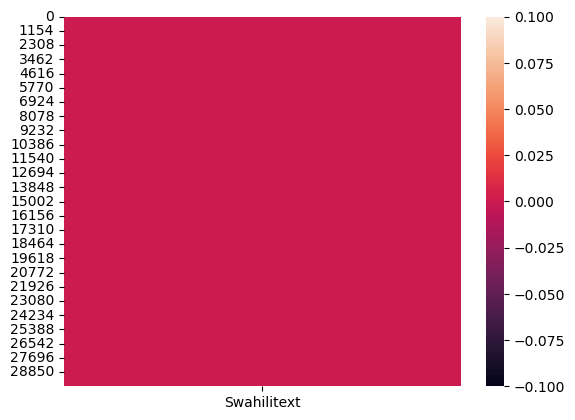

In [15]:
import seaborn as sb

sb.heatmap(data.isnull())

In [17]:
duplicated_count = data.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  1032


In [18]:
data = data.drop_duplicates('Swahilitext')

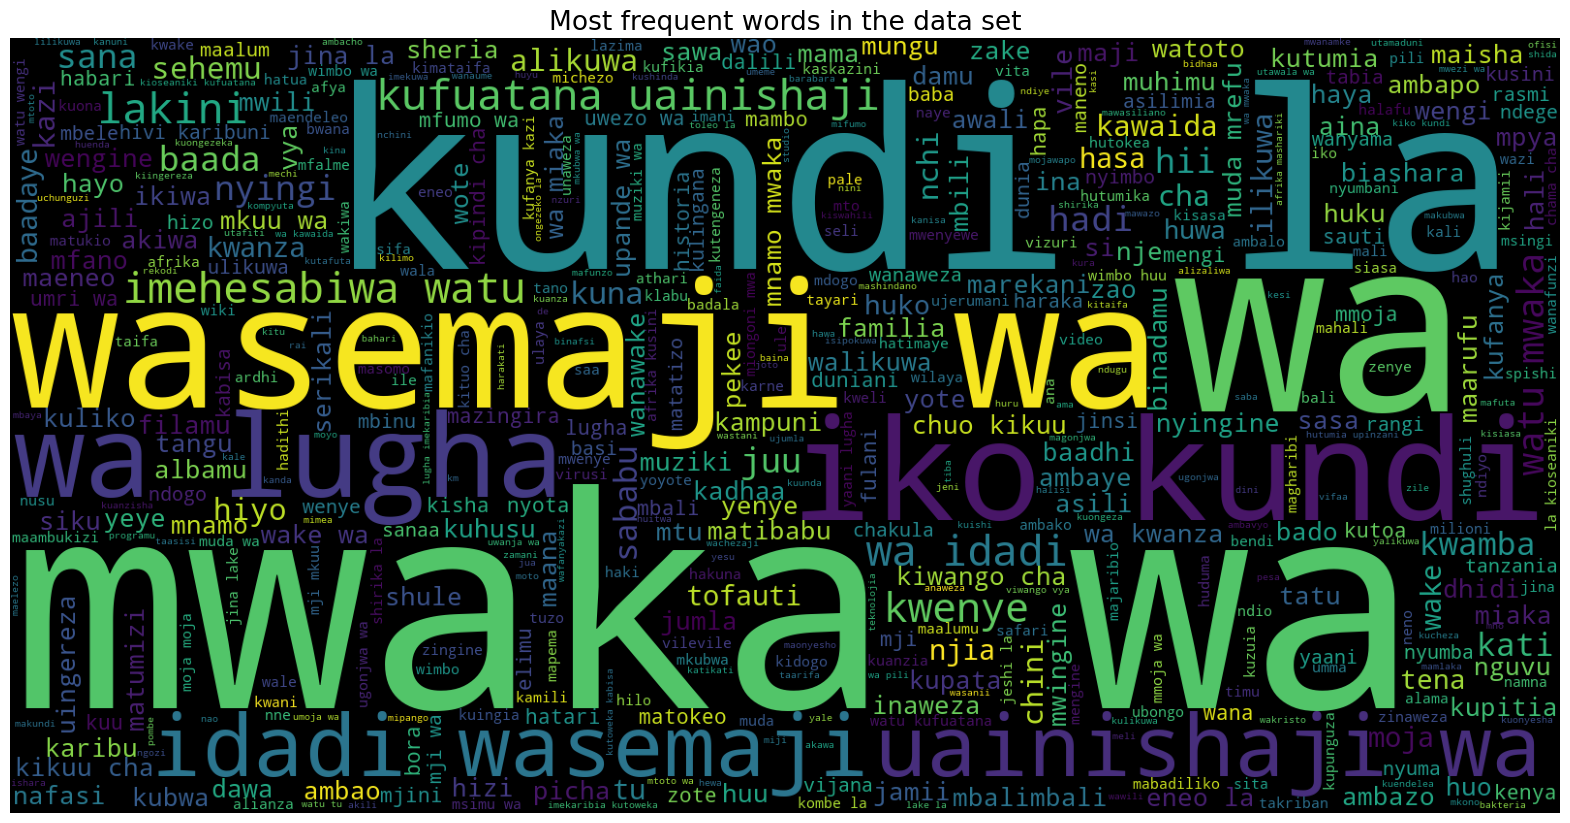

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join([word for word in data['Swahilitext']])
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.figure(figsize=(20,15), facecolor='None')
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most frequent words in the data set', fontsize = 19)
plt.show()

In [20]:
from nltk.tokenize import word_tokenize, sent_tokenize

text = data['Swahilitext'].to_string(index=False)
number_of_chararacters = len(text)
number_of_words = len(word_tokenize(text))
number_of_sentences = len(sent_tokenize(text))
print(f"Number of characters: {number_of_chararacters}")
print(f"Number of words: {number_of_words}")
print(f"Number of sentences: {number_of_sentences}")


Number of characters: 1477367
Number of words: 215572
Number of sentences: 1


In [21]:
#bag of words

from sklearn.feature_extraction.text import TfidfVectorizer

text_data = data['Swahilitext'].tolist()

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(text_data)

feature_names = vectorizer.get_feature_names()

print(feature_names)

['aa', 'aace', 'aache', 'aachie', 'aachiwe', 'aactin', 'aafc', 'aage', 'aah', 'aajiriwe', 'aalesund', 'aalimpeleka', 'aaliyah', 'aamini', 'aan', 'aana', 'aanaglie', 'aandike', 'aang', 'aangaliwe', 'aanza', 'aanze', 'aanzishe', 'aarifiwe', 'aaron', 'aarti', 'aashiqui', 'aashiria', 'aasia', 'ab', 'aba', 'ababa', 'abacha', 'abadallah', 'abadi', 'abadili', 'abahn', 'abakie', 'abakunta', 'abamwikirize', 'abaragori', 'abas', 'abasa', 'abasia', 'abati', 'abazo', 'abba', 'abbakka', 'abbas', 'abbey', 'abbot', 'abby', 'abc', 'abd', 'abdallah', 'abdallahi', 'abdel', 'abdellah', 'abdi', 'abdillah', 'abdu', 'abdul', 'abdulhakheem', 'abdulla', 'abdullah', 'abdullahi', 'abdulwahid', 'abeba', 'abebe', 'abeid', 'abel', 'abela', 'abelo', 'abeokuta', 'abercorn', 'abercynon', 'aberdare', 'aberdares', 'aberdeen', 'abeta', 'abeti', 'abhaighisho', 'abhanatta', 'abhashanake', 'abhiirienyi', 'abi', 'abidjan', 'abiia', 'abimeleki', 'abiria', 'abirienyi', 'abishaye', 'abitur', 'abkhaziabazini', 'ablc', 'abldrb',

C:\Users\Bill\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Speech tagging 

In [22]:
from nltk import word_tokenize
from nltk.classify import NaiveBayesClassifier

In [23]:
def word_ft(word):
    return {'word': word.lower()}

In [24]:
training_data = [
    ("Mambo yalikwenda yakiongezeka na kufikia mwaka alianzisha studio yake ya kisasa iliyoitwa mawingu studio eneo la mwenge dar es salaam .",
    [("Mambo", "NN"), ("yalikwenda", "VB"), ("yakiongezeka", "VB"), ("na", "CC"), ("kufikia", "IN"), ("mwaka", "NN"), ("alianzisha", "VB"), ("studio", "NN"), ("yake", "PRP$"), ("ya", "IN"), ("kisasa", "JJ"), ("iliyoitwa", "VB"), ("mawingu", "NN"), ("studio", "NN"), ("eneo", "NN"), ("la", "IN"), ("mwenge", "NN"), ("dar", "NN"), ("es", "NN"), ("salaam", "NN"), (".", ".")]),
    ("Sasa swali langu dada ni je watoto wetu tuwaleeje jamani ili wakuwe katika malezi bora .",
    [("Sasa", "NN"), ("swali", "NN"), ("langu", "PRP$"), ("dada", "NN"), ("ni", "VB"), ("je", "WRB"), ("watoto", "NN"), ("wetu", "PRP$"), ("tuwaleeje", "VB"), ("jamani", "UH"), ("ili", "IN"), ("wakuwe", "VB"), ("katika", "IN"), ("malezi", "NN"), ("bora", "JJ"), (".", ".")]),
    ("Tuiangalie kwanza sheria yenyewe inayotawala uwakili na mawakili Tanzania .",
    [("Tuiangalie", "VB"), ("kwanza", "RB"), ("sheria", "NN"), ("yenyewe", "PRP$"), ("inayotawala", "VB"), ("uwakili", "NN"), ("na", "CC"), ("mawakili", "NN"), ("Tanzania", "NNP"), (".", ".")]),
    ("Kisha akasema lengo lake ni kwamba anapendekeza mtu kwa manufaa ya mchezo huo hivyo kama watu anaotaka wabaki wanabaki basi ni lazima ampendekeze Meryl atolewe alisema .",
    [("Kisha", "RB"), ("akasema", "VB"), ("lengo", "NN"), ("lake", "PRP$"), ("ni", "VB"), ("kwamba", "IN"), ("anapendekeza", "VB"), ("mtu", "NN"), ("kwa", "IN"), ("manufaa", "NN"), ("ya", "IN"), ("mchezo", "NN"), ("huo", "PRP"), ("hivyo", "RB"), ("kama", "IN"), ("watu", "NN"), ("anaotaka", "VB"), ("wabaki", "VB"), ("wanabaki", "VB"), ("basi", "RB"), ("ni", "VB"), ("lazima", "RB"), ("ampendekeze", "VB"), ("Meryl", "NNP"), ("atolewe", "VB"), ("alisema", "VB"), (".", ".")]),
    ("aliendelea kudai kuwa wengi walijaribu kupotosha kuwa wabunge hao hawamtambui rais kikwete lakini baadaye wakashindwa kuthibitisha ukweli wa maneno yao na hatimaye wakakubaliana na hoja ya kufanyika kwa mabadiliko hususani katika katiba",
    [("aliendelea", "VB"), ("kudai", "VB"), ("kuwa", "IN"), ("wengi", "JJ"), ("walijaribu", "VB"), ("kupotosha", "VB"), ("kuwa", "IN"), ("wabunge", "NN"), ("hao", "PRP"), ("hawamtambui", "VB"), ("rais", "NN"), ("kikwete", "NNP"), ("lakini", "CC"), ("baadaye", "RB"), ("wakashindwa", "VB"), ("kuthibitisha", "VB"), ("ukweli", "NN"), ("wa", "IN"), ("maneno", "NN"), ("yao", "PRP"), ("na", "CC"), ("hatimaye", "RB"), ("wakakubaliana", "VB"), ("na", "IN"), ("hoja", "NN"), ("ya", "IN"), ("kufanyika", "VB"), ("kwa", "IN"), ("mabadiliko", "NN"), ("hususani", "RB"), ("katika", "IN"), ("katiba", "NN")]),
    ("kwa bahati mbaya wakati huo wa miaka ya  uwazi katika kuelezea masuala hayo ulikuwa mdogo na hivyo mambo kwa soksi ulipigwa marufuku na serikali",
    [("kwa", "IN"), ("bahati", "NN"), ("mbaya", "JJ"), ("wakati", "NN"), ("huo", "DT"), ("wa", "IN"), ("miaka", "NN"), ("ya", "IN"), ("uwazi", "NN"), ("katika", "IN"), ("kuelezea", "VB"), ("masuala", "NN"), ("hayo", "DT"), ("ulikuwa", "VB"), ("mdogo", "JJ"), ("na", "CC"), ("hivyo", "RB"), ("mambo", "NN"), ("kwa", "IN"), ("soksi", "NN"), ("ulipigwa", "VB"), ("marufuku", "NN"), ("na", "CC"), ("serikali", "NN")]),
    ("Mimi nina kuku .", [("Mimi", "PRP"), ("nina", "VBP"), ("kuku", "NN"), (".", ".")]),
    ("Wewe una paka .", [("Wewe", "PRP"), ("una", "VBP"), ("paka", "NN"), (".", ".")]),
    ("Mtoto huyo anapenda kucheza na paka yake .", [("Mtoto", "NN"), ("huyo", "DT"), ("anapenda", "VB"), ("kucheza", "NN"), ("na", "IN"), ("paka", "NN"), ("yake", "PRP$"), (".", ".")]),
    ("Wanafunzi wengi wanaojifunza Kiswahili wanaishi nje ya Afrika .", [("Wanafunzi", "NN"), ("wengi", "JJ"), ("wanaojifunza", "VBG"), ("Kiswahili", "NNP"), ("wanaishi", "VBP"), ("nje", "RB"), ("ya", "IN"), ("Afrika", "NNP"), (".", ".")]),
    ("Tunda jipya lilipatikana katika shamba la babu .", [("Tunda", "NN"), ("jipya", "JJ"), ("lilipatikana", "VB"), ("katika", "IN"), ("shamba", "NN"), ("la", "IN"), ("babu", "NN"), (".", ".")]),
    ("Mwalimu wetu anaonekana kuwa na uzoefu mkubwa .", [("Mwalimu", "NN"), ("wetu", "PRP$"), ("anaonekana", "VBZ"), ("kuwa", "VB"), ("na", "IN"), ("uzoefu", "NN"), ("mkubwa", "JJ"), (".", ".")]),
    ("Ndovu ni mnyama mkubwa na mwenye nguvu nyingi .", [("Ndovu", "NN"), ("ni", "VBZ"), ("mnyama", "NN"), ("mkubwa", "JJ"), ("na", "CC"), ("mwenye", "IN"), ("nguvu", "NN"), ("nyingi", "JJ"), (".", ".")]),
    ("Yeye ana sungura .", [("Yeye", "PRP"), ("ana", "VBP"), ("sungura", "NN"), (".", ".")]),
    ("Tunayo mbwa mzuri .", [("Tunayo", "PRP"), ("mbwa", "NN"), ("mzuri", "JJ"), (".", ".")]),
    ("Hakuna paka .", [("Hakuna", "DT"), ("paka", "NN"), (".", ".")]),
    ("Mtu huyo ni daktari .", [("Mtu", "NN"), ("huyo", "DT"), ("ni", "VBP"), ("daktari", "NN"), (".", ".")]),
    ("Baba yangu ni mfanyabiashara .", [("Baba", "NN"), ("yangu", "PRP"), ("ni", "VBP"), ("mfanyabiashara", "NN"), (".", ".")]),
    ("Kuna vitabu vingi sana .", [("Kuna", "VBZ"), ("vitabu", "NN"), ("vingi", "JJ"), ("sana", "RB"), (".", ".")]),
    ("Hapa ni mahali pazuri sana .", [("Hapa", "RB"), ("ni", "VBP"), ("mahali", "NN"), ("pazuri", "JJ"), ("sana", "RB"), (".", ".")]),
    ("Tafadhali nisaidie .", [("Tafadhali", "UH"), ("nisaidie", "VB"), (".", ".")]),
    ("Mimi nina barua yako .", [("Mimi", "PRP"), ("nina", "VBP"), ("barua", "NN"), ("yako", "PRP"), (".", ".")]),
    ("Huyu mtoto ni mzuri sana .", [("Huyu", "DT"), ("mtoto", "NN"), ("ni", "VBP"), ("mzuri", "JJ"), ("sana", "RB"), (".", ".")]),
    ("Yeye ni mfanyakazi mzuri .", [("Yeye", "PRP"), ("ni", "VBP"), ("mfanyakazi", "NN"), ("mzuri", "JJ"), (".", ".")]),
    ("Kesho ni sikukuu ya Pasaka .", [("Kesho", "NN"), ("ni", "VBP"), ("sikukuu", "NN"), ("ya", "IN"), ("Pasaka", "NNP"), (".", ".")]),
    ("Mimi nataka chakula cha jioni .", [("Mimi", "PRP"), ("nataka", "VBP"), ("chakula", "NN"), ("cha", "IN"), ("jioni", "NN"), (".", ".")]),
    ("Maji hayako safi .", [("Maji", "NN"), ("hayako", "VBZ"), ("safi", "JJ"), (".", ".")]),
    ("Rafiki yangu anapenda kula matunda .", [("Rafiki", "NN"), ("yangu", "PRP$"), ("anapenda", "VB"), ("kula", "VB"), ("matunda", "NN"), (".", ".")]),
    ("Mama yangu anasafiri kwenda Mombasa kesho asubuhi .", [("Mama", "NN"), ("yangu", "PRP$"), ("anasafiri", "VB"), ("kwenda", "IN"), ("Mombasa", "NNP"), ("kesho", "NN"), ("asubuhi", "NN"), (".", ".")]),
    ("Kwa nini hujibu ujumbe wangu ? ", [("Kwa", "IN"), ("nini", "WP"), ("hujibu", "VB"), ("ujumbe", "NN"), ("wangu", "PRP$"), ("?", ".")]),
    ("Mwalimu wangu ni mzuri sana kufundisha .", [("Mwalimu", "NN"), ("wangu", "PRP$"), ("ni", "VB"), ("mzuri", "JJ"), ("sana", "RB"), ("kufundisha", "VB"), (".", ".")]),
    ("Mashabiki wa timu ya Simba walishangilia baada ya kushinda mchezo .", [("Mashabiki", "NN"), ("wa", "IN"), ("timu", "NN"), ("ya", "IN"), ("Simba", "NNP"), ("walishangilia", "VBD"), ("baada", "IN"), ("ya", "IN"), ("kushinda", "VB"), ("mchezo", "NN"), (".", ".")]),
    ("Baba yangu alinipa zawadi ya kitabu kipya .", [("Baba", "NN"), ("yangu", "PRP$"), ("alinipa", "VBD"), ("zawadi", "NN"), ("ya", "IN"), ("kitabu", "NN"), ("kipya", "JJ"), (".", ".")]),
    ("Mtu huyo anasema kweli kabisa kuhusu suala hili .", [("Mtu", "NN"), ("huyo", "DT"), ("anasema", "VB"), ("kweli", "NN"), ("kabisa", "RB"), ("kuhusu", "IN"), ("suala", "NN"), ("hili", "DT"), (".", ".")]),
    ("Mimi hufurahi sana ninapokuwa na familia yangu .", [("Mimi", "PRP"), ("hufurahi", "VB"), ("sana", "RB"), ("ninapokuwa", "IN"), ("na", "IN"), ("familia", "NN"), ("yangu", "PRP$"), (".", ".")]),
    ("Chakula cha jioni kilikuwa cha kitajiri na kizuri sana .", [("Chakula", "NN"), ("cha", "IN"), ("jioni", "NN"), ("kilikuwa", "VB"), ("cha", "DT"), ("kitajiri", "JJ"), ("na", "CC"), ("kizuri", "JJ"), ("sana", "RB"), (".", ".")]),
    ("Rais huyo wa tff akawataka watanzania waungane nao katika kusaidia upatikanaji wa fedha zilizobaki ili hatimaye wajihakikishie ushiriki usio na shaka wa michuano hiyo mikubwa zaidi kwa soka la wanawake barani afrika",
    [("Rais", "NN"), ("huyo", "DT"), ("wa", "IN"), ("tff", "NN"), ("akawataka", "VB"), ("watanzania", "NN"), ("waungane", "VB"), ("nao", "PRP"), ("katika", "IN"), ("kusaidia", "VB"), ("upatikanaji", "NN"), ("wa", "IN"), ("fedha", "NN"), ("zilizobaki", "VB"), ("ili", "IN"), ("hatimaye", "RB"), ("wajihakikishie", "VB"), ("ushiriki", "NN"), ("usio", "NEG"), ("na", "CC"), ("shaka", "NN"), ("wa", "IN"), ("michuano", "NN"), ("hiyo", "DT"), ("mikubwa", "JJ"), ("zaidi", "RB"), ("kwa", "IN"), ("soka", "NN"), ("la", "IN"), ("wanawake", "NN"), ("barani", "NN"), ("afrika", "NN")]),
    ("akizungumzia filamu hiyo ambayo yeye ndiye mhusika mkuu myamba anasema kuwa anaigiza kama mwanamume ambaye ana maisha mazuri na familia yake kutokana na kazi anayoifanya lakini anapata wito wa mungu awe mchungaji",
    [("akizungumzia", "VB"), ("filamu", "NN"), ("hiyo", "DT"), ("ambayo", "REL"), ("yeye", "PRP"), ("ndiye", "PRP"), ("mhusika", "NN"), ("mkuu", "JJ"), ("myamba", "NN"), ("anasema", "VB"), ("kuwa", "IN"), ("anaigiza", "VB"), ("kama", "IN"), ("mwanamume", "NN"), ("ambaye", "REL"), ("ana", "VB"), ("maisha", "NN"), ("mazuri", "JJ"), ("na", "CC"), ("familia", "NN"), ("yake", "PRP$"), ("kutokana", "IN"), ("na", "CC"), ("kazi", "NN"), ("anayoifanya", "VB"), ("lakini", "CC"), ("anapata", "VB"), ("wito", "NN"), ("wa", "IN"), ("mungu", "NN"), ("awe", "VB"), ("mchungaji", "NN")]),
    ("ipo miungano ya kimikoa kijimbo na kikanda katika mataifa mbalimbali barani afrika na kwingine duniani lakini imetawaliwa na udini ukabila ubaguzi wa rangi chuki na aina nyingine za utengano unaokwamisha umoja wa kitaifa",
    [("ipo", "VBZ"), ("miungano", "NN"), ("ya", "IN"), ("kimikoa", "JJ"), ("kijimbo", "JJ"), ("na", "CC"), ("kikanda", "JJ"), ("katika", "IN"), ("mataifa", "NN"), ("mbalimbali", "JJ"), ("barani", "NN"), ("afrika", "NN"), ("na", "CC"), ("kwingine", "NN"), ("duniani", "NN"), ("lakini", "CC"), ("imetawaliwa", "VB"), ("na", "IN"), ("udini", "NN"), ("ukabila", "NN"), ("ubaguzi", "NN"), ("wa", "IN"), ("rangi", "NN"), ("chuki", "NN"), ("na", "CC"), ("aina", "NN"), ("nyingine", "JJ"), ("za", "IN"), ("utengano", "NN"), ("unaokwamisha", "VB"), ("umoja", "NN"), ("wa", "IN"), ("kitaifa", "JJ")]),
    ("waliochukua hatua hiyo ni ongujo wakibara diwani wa kata ya mkoma shirati na lukio ambogo diwani wa kata ya nyahongo",
    [("waliochukua", "VB"), ("hatua", "NN"), ("hiyo", "DT"), ("ni", "VB"), ("ongujo", "NN"), ("wakibara", "NN"), ("diwani", "NN"), ("wa", "IN"), ("kata", "NN"), ("ya", "mkoma", "NN"), ("shirati", "NN"), ("na", "CC"), ("lukio", "NN"), ("ambogo", "NN"), ("diwani", "NN"), ("wa", "IN"), ("kata", "NN"), ("ya", "nyahongo", "NN")]),
    ("anasema hadi atahakikisha yale yote yaliyokuwa katika programu zake yanakamilika na kwamba hata baada ya kuachana na ubunge ataendelea kushirikiana na wananchi katika kukamilisha miradi ya maendeleo ya jimbo hilo",
    [("anasema", "VB"), ("hadi", "IN"), ("atahakikisha", "VB"), ("yale", "DT"), ("yote", "DT"), ("yaliyokuwa", "VB"), ("katika", "IN"), ("programu", "NN"), ("zake", "PRP$"), ("yanakamilika", "VB"), ("na", "CC"), ("kwamba", "IN"), ("hata", "RB"), ("baada", "IN"), ("ya", "IN"), ("kuachana", "VB"), ("na", "IN"), ("ubunge", "NN"), ("ataendelea", "VB"), ("kushirikiana", "VB"), ("na", "IN"), ("wananchi", "NN"), ("katika", "IN"), ("kukamilisha", "VB"), ("miradi", "NN"), ("ya", "IN"), ("maendeleo", "NN"), ("ya", "IN"), ("jimbo", "NN"), ("hilo", "DT")]),
    ("anafahamisha kuwa alipohamia shule ya msingi kiwalani alikutana na mwalimu betty ambaye alibaini kipaji chake mapema",
    [("anafahamisha", "VB"), ("kuwa", "IN"), ("alipohamia", "VB"), ("shule", "NN"), ("ya", "IN"), ("msingi", "NN"), ("kiwalani", "NN"), ("alikutana", "VB"), ("na", "IN"), ("mwalimu", "NN"), ("betty", "NN"), ("ambaye", "WDT"), ("alibaini", "VB"), ("kipaji", "NN"), ("chake", "PRP$"), ("mapema", "JJ")]),
    ("ziara hiyo ilikuwa ni moja ya maandalizi ya mwisho ya timu hiyo iliyokuwa ikiajiandaa na michuano ya mataifa afrika iliyokuwa ikifanyika angola",
    [("ziara", "NN"), ("hiyo", "DT"), ("ilikuwa", "VB"), ("ni", "IN"), ("moja", "CD"), ("ya", "IN"), ("maandalizi", "NN"), ("ya", "IN"), ("mwisho", "NN"), ("ya", "IN"), ("timu", "NN"), ("hiyo", "DT"), ("iliyokuwa", "VB"), ("ikiajiandaa", "VB"), ("na", "CC"), ("michuano", "NN"), ("ya", "IN"), ("mataifa", "NN"), ("afrika", "NN"), ("iliyokuwa", "VB"), ("ikifanyika", "VB"), ("angola", "NN")]),
    ("kazi ya kuchonga ardhi kwa ajili ya ujenzi wa barabara inapomalizika na ujenzi wake kukamilika na lami kuwekwa gari hilo halihitajiki tena na likipita katika barabara lililoichonga linatafsiriwa kuwa haribifu",
    [("kazi", "NN"), ("ya", "IN"), ("kuchonga", "VB"), ("ardhi", "NN"), ("kwa", "IN"), ("ajili", "NN"), ("ya", "IN"), ("ujenzi", "NN"), ("wa", "IN"), ("barabara", "NN"), ("inapomalizika", "VB"), ("na", "CC"), ("ujenzi", "NN"), ("wake", "PRP$"), ("kukamilika", "VB"), ("na", "CC"), ("lami", "NN"), ("kuwekwa", "VB"), ("gari", "NN"), ("hilo", "DT"), ("halihitajiki", "VB"), ("tena", "RB"), ("na", "CC"), ("likipita", "VB"), ("katika", "IN"), ("barabara", "NN"), ("lililoichonga", "VB"), ("linatafsiriwa", "VB"), ("kuwa", "VB"), ("haribifu", "NN")]),
    ("slaa alisema hatua ya tendwa ina dalili za kuipendelea ccm na kumbeba mgombea urais wake rais jakaya kikwete",
    [("slaa", "NN"), ("alisema", "VB"), ("hatua", "NN"), ("ya", "IN"), ("tendwa", "NN"), ("ina", "VB"), ("dalili", "NN"), ("za", "IN"), ("kuipendelea", "VB"), ("ccm", "NN"), ("na", "CC"), ("kumbeba", "VB"), ("mgombea", "NN"), ("urais", "NN"), ("wake", "PRP$"), ("rais", "NN"), ("jakaya", "NNP"), ("kikwete", "NNP")]),
    ("saturday jan badilisha lugha kiswahili home entertainment miss tanzania kuzawadiwa gari ya shinda mkoko gari atakayo zawadiwa vodacom miss tanzania aina ya hyundai i lenye thamani ya sh",
    [("saturday", "NN"), ("jan", "NN"), ("badilisha", "VB"), ("lugha", "NN"), ("kiswahili", "NN"), ("home", "NN"), ("entertainment", "NN"), ("miss", "NN"), ("tanzania", "NN"), ("kuzawadiwa", "VB"), ("gari", "NN"), ("ya", "IN"), ("shinda", "NN"), ("mkoko", "NN"), ("gari", "NN"), ("atakayo", "VB"), ("zawadiwa", "VB"), ("vodacom", "NNP"), ("miss", "NN"), ("tanzania", "NN"), ("aina", "NN"), ("ya", "IN"), ("hyundai", "NN"), ("i", "NN"), ("lenye", "VB"), ("thamani", "NN"), ("ya", "IN"), ("sh", "NN")]),
]


In [25]:
training_ft = []
for sentence, tags in training_data:
    for word, *tag in tags:
        features = word_ft(word_tokenize(word)[0])
        training_ft.append((features, tuple(tag[:2])))

# Training Naive Bayes classifier
classifier = NaiveBayesClassifier.train(training_ft)




In [26]:
print(training_ft[:100])


[({'word': 'mambo'}, ('NN',)), ({'word': 'yalikwenda'}, ('VB',)), ({'word': 'yakiongezeka'}, ('VB',)), ({'word': 'na'}, ('CC',)), ({'word': 'kufikia'}, ('IN',)), ({'word': 'mwaka'}, ('NN',)), ({'word': 'alianzisha'}, ('VB',)), ({'word': 'studio'}, ('NN',)), ({'word': 'yake'}, ('PRP$',)), ({'word': 'ya'}, ('IN',)), ({'word': 'kisasa'}, ('JJ',)), ({'word': 'iliyoitwa'}, ('VB',)), ({'word': 'mawingu'}, ('NN',)), ({'word': 'studio'}, ('NN',)), ({'word': 'eneo'}, ('NN',)), ({'word': 'la'}, ('IN',)), ({'word': 'mwenge'}, ('NN',)), ({'word': 'dar'}, ('NN',)), ({'word': 'es'}, ('NN',)), ({'word': 'salaam'}, ('NN',)), ({'word': '.'}, ('.',)), ({'word': 'sasa'}, ('NN',)), ({'word': 'swali'}, ('NN',)), ({'word': 'langu'}, ('PRP$',)), ({'word': 'dada'}, ('NN',)), ({'word': 'ni'}, ('VB',)), ({'word': 'je'}, ('WRB',)), ({'word': 'watoto'}, ('NN',)), ({'word': 'wetu'}, ('PRP$',)), ({'word': 'tuwaleeje'}, ('VB',)), ({'word': 'jamani'}, ('UH',)), ({'word': 'ili'}, ('IN',)), ({'word': 'wakuwe'}, ('VB',)

In [27]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [34]:
!pip install pyspark


     -------------------------------------- 310.8/310.8 MB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317146 sha256=75fb45f6a047c53482b57b62d3b829297fe317d3126fb7ee14a45e2f4e10e74f
  Stored in directory: c:\users\bill\appdata\local\pip\cache\wheels\9f\34\a4\159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [27]:
# Install PySpark and Spark NLP
! pip install -q pyspark==3.3.0 spark-nlp==4.2.8

In [28]:
import pandas as pd
import numpy as np
import json

from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

import sparknlp
from sparknlp.annotator import *
from sparknlp.base import *
from sparknlp.pretrained import PretrainedPipeline
from pyspark.sql.types import StringType, IntegerType

In [33]:
spark = sparknlp.start()
print ("Spark NLP Version :", sparknlp.version())
spark

In [37]:

df = pd.read_csv('Swahili_processedData.csv', encoding='utf-8')

text = df['Swahilitext'].tolist()

document_assembler = DocumentAssembler() \
      .setInputCol("text") \
      .setOutputCol("document")

tokenizer = Tokenizer() \
      .setInputCols(["document"]) \
      .setOutputCol("token")
    
normalizer = Normalizer() \
      .setInputCols(["token"]) \
      .setOutputCol("normalized")

stopwords_cleaner = StopWordsCleaner.pretrained("stopwords_sw", "sw") \
        .setInputCols(["normalized"]) \
        .setOutputCol("cleanTokens")\
        .setCaseSensitive(False)

embeddings = XlmRoBertaEmbeddings.pretrained("xlm_roberta_base_finetuned_swahili", "sw")\
    .setInputCols(["document", "cleanTokens"])\
    .setOutputCol("embeddings")

embeddingsSentence = SentenceEmbeddings() \
      .setInputCols(["document", "embeddings"]) \
      .setOutputCol("sentence_embeddings") \
      .setPoolingStrategy("AVERAGE")

sentimentClassifier = ClassifierDLModel.pretrained("classifierdl_xlm_roberta_sentiment", "sw") \
  .setInputCols(["sentence_embeddings"]) \
  .setOutputCol("class_")

sw_pipeline = Pipeline(
    stages=[
        document_assembler, 
        tokenizer, 
        normalizer, 
        stopwords_cleaner, 
        embeddings, 
        embeddingsSentence, 
        sentimentClassifier
        ])

In [38]:
import pandas as pd

# read in the CSV file
df = pd.read_csv('Swahili_processedData.csv', encoding='utf-8')

# get the 'Swahilitext' column as a list of strings
swahili_text = df['Swahilitext'].tolist()

df = spark.createDataFrame([(s,) for s in swahili_text], ["text"])
result = sw_pipeline.fit(df).transform(df)

result.select(F.explode(F.arrays_zip(result.document.result, 
                                     result.class_.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("Swahilitext"),
              F.expr("cols['1']").alias('Sentiments')) \
      .coalesce(1) \
      .write \
      .option("header", "true") \
      .csv("swahili_sentiment.csv")

In [30]:
df = pd.read_csv('swahili_sentiment.csv', encoding='utf-8')

C:\Users\Bill\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiments', ylabel='count'>

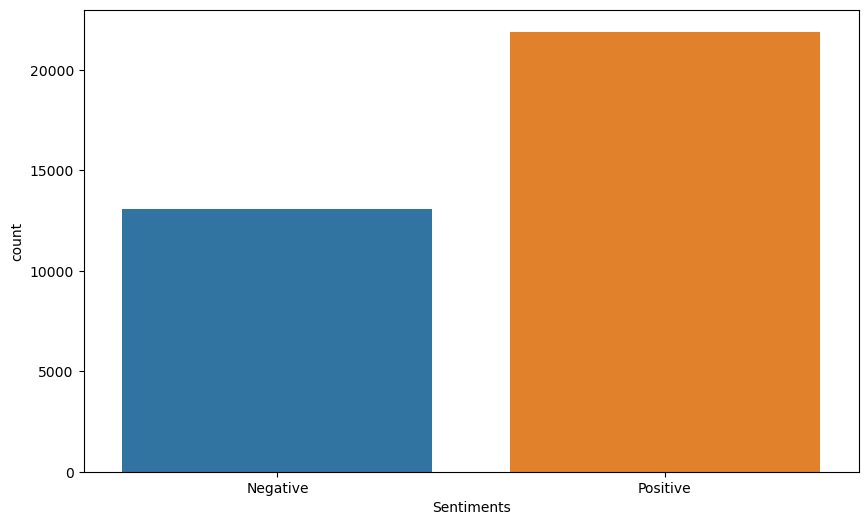

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(df['Sentiments'])


In [32]:
temp = df.groupby('Sentiments').count()['Swahilitext'].reset_index().sort_values(by='Swahilitext',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Sentiments,Swahilitext
1,Positive,21906
0,Negative,13074


## Spliting data to training set and testing set

In [33]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# size of the training data
print("Training data size:", train_data.shape)

# size of the testing data
print("Testing data size:", test_data.shape)

Training data size: (27984, 2)
Testing data size: (6996, 2)


# Comparing performance interms of Accuracy, precision, and recall using machine learning algorithms

# Naïve Bayes

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [35]:
vectorizer = CountVectorizer()
train_vectors = vectorizer.fit_transform(train_data['Swahilitext'])
test_vectors = vectorizer.transform(test_data['Swahilitext'])

nb = MultinomialNB()
nb.fit(train_vectors, train_data['Sentiments'])

nb_predictions = nb.predict(test_vectors)

nb_accuracy = accuracy_score(test_data['Sentiments'], nb_predictions)
nb_precision = precision_score(test_data['Sentiments'], nb_predictions, average='macro')
nb_recall = recall_score(test_data['Sentiments'], nb_predictions, average='macro')

print('Naïve Bayes accuracy: {:.2f}%'.format(nb_accuracy*100))
print('Naïve Bayes precision:{:.2f}%'.format(nb_precision*100))
print('Naïve Bayes recall: {:.2f}%'.format(nb_recall*100))




Naïve Bayes accuracy: 80.13%
Naïve Bayes precision:79.05%
Naïve Bayes recall: 78.34%


In [36]:
tfidf_vectorizer = TfidfVectorizer()
train_tfidf_vectors = tfidf_vectorizer.fit_transform(train_data['Swahilitext'])
test_tfidf_vectors = tfidf_vectorizer.transform(test_data['Swahilitext'])

svm = LinearSVC()
svm.fit(train_tfidf_vectors, train_data['Sentiments'])

svm_predictions = svm.predict(test_tfidf_vectors)

svm_accuracy = accuracy_score(test_data['Sentiments'], svm_predictions)
svm_precision = precision_score(test_data['Sentiments'], svm_predictions, average='macro')
svm_recall = recall_score(test_data['Sentiments'], svm_predictions, average='macro')

print('Support Vector Machine accuracy:  {:.2f}%'.format(svm_accuracy*100))
print('Support Vector Machine precision: {:.2f}%'.format( svm_precision*100))
print('Support Vector Machine recall: {:.2f}%'.format(svm_recall*100))

Support Vector Machine accuracy:  84.02%
Support Vector Machine precision: 83.45%
Support Vector Machine recall: 82.22%


In [40]:
lr = LogisticRegression()
lr.fit(train_tfidf_vectors, train_data['Sentiments'])

lr_predictions = lr.predict(test_tfidf_vectors)

lr_accuracy = accuracy_score(test_data['Sentiments'], lr_predictions)
lr_precision = precision_score(test_data['Sentiments'], lr_predictions, average='macro')
lr_recall = recall_score(test_data['Sentiments'], lr_predictions, average='macro')

print('Logistic Regression accuracy:{:.2f}%'.format(lr_accuracy*100))
print('Logistic Regression precision:{:.2f}%'.format( lr_precision*100))
print('Logistic Regression recall:{:.2f}%'.format( lr_recall*100))

Logistic Regression accuracy:81.07%
Logistic Regression precision:81.29%
Logistic Regression recall:77.83%


C:\Users\Bill\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Bill/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import random 

stop_words = ['na', 'ya', 'kwa', 'za', 'ni', 'wakati', 'hata', 'ili', 'kuwa', 
    'au', 'katika', 'kama', 'ambayo', 'yake', 'kwa sababu', 'hapo awali', 
    'kila', 'bila', 'baada ya', 'ingawa', 'pia', 'ndani', 'juu ya', 
    'kwa hiyo', 'mwisho', 'hivyo', 'kutoka', 'hapo', 'mara', 'kabla',
    'kutokana', 'kuelekea', 'kati ya', 'zaidi', 'chini ya', 'leo', 
    'kwenda', 'mpaka', 'pengine', 'hapana', 'huyo', 'pamoja',  
    'kiasi', 'labda', 'chache', 'yangu', 'yako', 'yao', ]
def classify(text):
    # Tokenize the input text
    words = nltk.word_tokenize(text)
    # Remove stopwords and punctuations
    words = [word.lower() for word in words if word.lower() not in stop_words and word.lower() not in string.punctuation]
    # Create a bag of words
    bagwords = dict([(word, True) for word in words])
    # Classify using the trained classifier
    return classifier.classify(bagwords)


def chat():
    # Greet the user
    print("Habari, mimi ni chatbot. Leo nikusaidieje?")

    while True:
        user_input = input("> ").lower().strip()

        if user_input in ['Asante', 'exit', 'kwaheri']:
            print("Kwaheri!")
            break

        # Tokenize user input into a list of words
        user_words = user_input.split()

        # Extract features from user input
        user_features = features(user_words)

        # Classify user input using the trained classifier
        predicted_tag = classifier.classify(user_features)

# define the responses
greetings = ['Habari?', 'Vipi?', 'Mambo?', 'Shikamoo!']
goodbyes = ['Kwaheri!', 'Tutaonana!', 'Lala salama!', 'Bye!']
thanks = ['Asante sana!', 'Shukrani!', 'Ahsante!', 'Nashukuru!']
no_response = ['Samahani, sikuweza kukuelewa.', 'Tafadhali niseme upya, sikuelewi.', 'Sijaelewa unachosema.']

# define the patterns
patterns = [
    {
        'tag': 'greeting',
        'patterns': ['habari', 'vipi', 'mambo', 'shikamoo']
    },
    {
        'tag': 'goodbye',
        'patterns': ['kwaheri', 'tutaonana', 'lala salama', 'bye']
    },
    {
        'tag': 'thanks',
        'patterns': ['asante', 'shukrani', 'ahsante', 'nashukuru']
    }
]

# define the responses for each pattern
responses = {
    'greeting': random.choice(greetings),
    'goodbye': random.choice(goodbyes),
    'thanks': random.choice(thanks)
}

# classify the input text
def classify(text):
    for pattern in patterns:
        for word in pattern['patterns']:
            if word in text.lower():
                return pattern['tag']
    return 'no_response'

# generate a response based on the input tag
def generate_response(tag):
    if tag != 'no_response':
        return responses[tag]
    else:
        return random.choice(no_response)

# chatbot
print('Bot: Habari, jina langu ni Chatbot. Naweza kukusaidia vipi?')
while True:
    text = input('You: ')
    tag = classify(text)
    response = generate_response(tag)
    print('Bot: ' + response)
    
    user_vector = tfidf_vectorizer.transform([text])

    prediction = lr.predict(user_vector)[0]

    print('Predicted sentiment:', prediction)
    
    if tag == 'goodbye':
        break

        
        

Bot: Habari, jina langu ni Chatbot. Naweza kukusaidia vipi?
You: HABARI
Bot: Habari?
Predicted sentiment: Positive
You: CHAKULA KIPI KIBAYA
Bot: Sijaelewa unachosema.
Predicted sentiment: Negative
